# 1. Importe un csv
- Importe el set de datos creados por usted al final de la sesión pasada.

In [1]:
import pandas as pd
df=pd.read_csv('subsample_sfh_demo.csv')

## 2. Importe su conjunto de funciones
- Genere un archivo `ancilliary_funcs.py` para guardar las funciones creadas en la sesión pasada e impórtelo.
- Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.

In [7]:
import ancilliary_funcs as funciones

In [8]:
dataframe=df
var='wvs_relacc'
funciones.funcion_perdidas(dataframe,var,print_lis=False)

(73, 0.7525773195876289)

En la siguiente tabla se visualiza la cantidad de casos perdidos por cada una de las variables, se observa que las variables con menos casos perdidos son `'gle_cgdpc'`, `'gle_gdp'` y `'gle_pop'`

In [10]:
cantidad=[]
variable=[]
porcentaje=[]
for i in df.columns:
#    print("Variable - "+i)
    f=funciones.funcion_perdidas(df,i,False)
#    print("La cantidad de NA es: "+str(f[0]))
#    print("El porcentaje de NA es: "+str(f[1]))
    cantidad.append(f[0])
    porcentaje.append(f[1])
    variable.append(i)
#    print("\n")
    
pd.DataFrame(zip(variable,cantidad),columns=['var','q']).sort_values(by=['q'])


var   q
0      Unnamed: 0   0
741     gle_cgdpc   0
742       gle_gdp   0
743       gle_pop   0
744     gle_rgdpc   0
...           ...  ..
1346  une_dorg6pf  91
1142         p_sf  92
1156    psi_cpsi2  97
1158   psi_edate2  97
1160     psi_psi2  97

[1883 rows x 2 columns]

## 3. Estime el puntaje Z de una variable
Estime el puntaje Z la variables que posea la menor cantidad de datos perdidos (o que no posea).
- Genere una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: zi= (xi−x)/σ(x)
- Para ordenar los valores pueden utilizar la función `sort_values` del DataFrame analizado. Lean la documentación asociada al argumento `by`.
- Asegúrense de eliminar las observaciones que tengan valores perdidos con ​dropna​. Lean la documentación asociada al argumento ​subset​.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?


In [13]:
# Funcion para puntaje z
def get_cscore(df,columna,caso):
    get_point=df[df['cname']==caso][columna]
    preproc=df[columna].dropna()
    get_mean=preproc.mean()
    get_std=preproc.std()
    return float(get_point-get_mean)/get_std

In [15]:
var=['gle_cgdpc',
'gle_gdp',
'gle_pop'
]
ls_z=[]
for i in df.cname:
    get_z=get_cscore(df,'gle_cgdpc',i)
    ls_z.append(get_z)
df['gle_cgdpc_Z']=ls_z

In [16]:
df.sort_values(by='gle_cgdpc_Z',ascending=False,inplace=True)

In [17]:
df.head(10)

Unnamed: 0  ccode          cname ccodealp  ccodecow  ccodewb  \
22         141    634          Qatar      QAT     694.0    634.0   
82          99    438  Liechtenstein      LIE     223.0    438.0   
96         101    442     Luxembourg      LUX     212.0    442.0   
78         168    756    Switzerland      CHE     225.0    756.0   
24         186    840  United States      USA       2.0    840.0   
85          80    372        Ireland      IRL     205.0    372.0   
58          23     96         Brunei      BRN     835.0     96.0   
23         148    674     San Marino      SMR     331.0    674.0   
50         167    752         Sweden      SWE     380.0    752.0   
40           9     40        Austria      AUT     305.0     40.0   

          version  aid_cpnc      aid_cpsc  aid_crnc  ...  wvs_relsch  \
22  QoGStdCSJan18       NaN           NaN       NaN  ...         NaN   
82  QoGStdCSJan18       NaN           NaN       NaN  ...         NaN   
96  QoGStdCSJan18      85.0  2.141245e+08       NaN  ...         NaN   
78  QoGStdCSJan18     111.0  1.703049e+09       NaN  ...         NaN   
24  QoGStdCSJan18     134.0  1.970151e+10       NaN  ...    2.190265   
85  QoGStdCSJan18      84.0  3.913700e+08       NaN  ...         NaN   
58  QoGStdCSJan18       NaN           NaN       NaN  ...         NaN   
23  QoGStdCSJan18       NaN           NaN       NaN  ...         NaN   
50  QoGStdCSJan18     110.0  1.494606e+09       NaN  ...    3.271945   
40  QoGStdCSJan18     103.0  3.775100e+08       NaN  ...         NaN   

    wvs_relsci  wvs_satfin  wvs_satlif  wvs_screl  wvs_subh  wvs_survself  \
22         NaN         NaN         NaN        NaN       NaN           NaN   
82         NaN         NaN         NaN        NaN       NaN           NaN   
96         NaN         NaN         NaN        NaN       NaN           NaN   
78         NaN         NaN         NaN        NaN       NaN           NaN   
24    2.334649    6.148271    7.371460   5.618658  4.051730      0.769875   
85         NaN         NaN         NaN        NaN       NaN           NaN   
58         NaN         NaN         NaN        NaN       NaN           NaN   
23         NaN         NaN         NaN        NaN       NaN           NaN   
50    1.544266    6.944547    7.548718   3.235888  4.032868      1.513079   
40         NaN         NaN         NaN        NaN       NaN           NaN   

    wvs_tradrat  wvs_trust  gle_cgdpc_Z  
22          NaN        NaN     4.792723  
82          NaN        NaN     4.696343  
96          NaN        NaN     2.516815  
78          NaN        NaN     1.932423  
24    -0.001648   0.351394     1.789144  
85          NaN        NaN     1.717222  
58          NaN        NaN     1.700239  
23          NaN        NaN     1.516670  
50     1.188317   0.617692     1.321164  
40          NaN        NaN     1.314073  

[10 rows x 1884 columns]

In [18]:
df.tail(10)

Unnamed: 0  ccode                       cname ccodealp  ccodecow  ccodewb  \
38         187    854                Burkina Faso      BFA     439.0    854.0   
55         172    768                        Togo      TGO     461.0    768.0   
69          72    332                       Haiti      HTI      41.0    332.0   
20          39    174                     Comoros      COM     581.0    174.0   
28          54    231            Ethiopia (1993-)      ETH     530.0    231.0   
47          32    140    Central African Republic      CAF     482.0    140.0   
92         125    562                       Niger      NER     436.0    562.0   
57          97    430                     Liberia      LBR     450.0    430.0   
95          52    222                 El Salvador      SLV      92.0    222.0   
17          41    180  Congo, Democratic Republic      COD     490.0    180.0   

          version  aid_cpnc  aid_cpsc  aid_crnc  ...  wvs_relsch  wvs_relsci  \
38  QoGStdCSJan18       NaN       NaN      23.0  ...         NaN         NaN   
55  QoGStdCSJan18       NaN       NaN      21.0  ...         NaN         NaN   
69  QoGStdCSJan18       NaN       NaN      23.0  ...         NaN         NaN   
20  QoGStdCSJan18       NaN       NaN      11.0  ...         NaN         NaN   
28  QoGStdCSJan18       NaN       NaN      28.0  ...         NaN         NaN   
47  QoGStdCSJan18       NaN       NaN      22.0  ...         NaN         NaN   
92  QoGStdCSJan18       NaN       NaN      19.0  ...         NaN         NaN   
57  QoGStdCSJan18       NaN       NaN      18.0  ...         NaN         NaN   
95  QoGStdCSJan18       NaN       NaN      21.0  ...         NaN         NaN   
17  QoGStdCSJan18       NaN       NaN      23.0  ...         NaN         NaN   

    wvs_satfin  wvs_satlif  wvs_screl  wvs_subh  wvs_survself  wvs_tradrat  \
38         NaN         NaN        NaN       NaN           NaN          NaN   
55         NaN         NaN        NaN       NaN           NaN          NaN   
69         NaN         NaN        NaN       NaN           NaN          NaN   
20         NaN         NaN        NaN       NaN           NaN          NaN   
28         NaN         NaN        NaN       NaN           NaN          NaN   
47         NaN         NaN        NaN       NaN           NaN          NaN   
92         NaN         NaN        NaN       NaN           NaN          NaN   
57         NaN         NaN        NaN       NaN           NaN          NaN   
95         NaN         NaN        NaN       NaN           NaN          NaN   
17         NaN         NaN        NaN       NaN           NaN          NaN   

    wvs_trust  gle_cgdpc_Z  
38        NaN    -0.701775  
55        NaN    -0.704960  
69        NaN    -0.705566  
20        NaN    -0.708372  
28        NaN    -0.712192  
47        NaN    -0.723439  
92        NaN    -0.725867  
57        NaN    -0.734207  
95        NaN    -0.742533  
17        NaN    -0.742965  

[10 rows x 1884 columns]

La caracteristica en comun que tienen los paises que mas se alejan de la media, hasta 4,7 desviaciones estandar, es que son paises de altos ingresos y GDP. Por otra parte los paises que mas se alejan de la media, hasta -0,74 desviaciones estandar son paises de bajos ingresos.

In [19]:
list_numero=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list_nombre=['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian', 'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia', 'Pacific', 'Caribbean' ]
dict_ht_region=dict(zip(list_numero,list_nombre))
df.ht_region.replace(dict_ht_region, inplace=True)

## 4. Estime el puntaje z de las regiones
Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
- Para ello realice un ​dotplot que muestre el valor promedio de su variable por cada región.
- Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar).

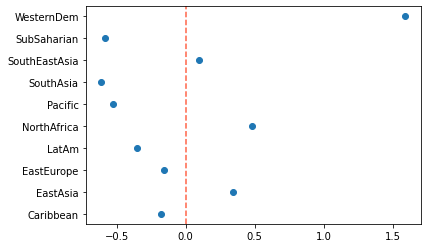

In [153]:
funcion.funcion_grafico_2(df,'ht_region','gle_cgdpc_Z',statistic='mean',global_stat=True)

## 5. Curvas de Densidad de Probabilidad
- Genere una función que permita visualizar las curvas de Densidad de Probabilidad para las variables ​imf_pop,​ ​gle_cgdpc ​y wdi_exph​.
- La función debe contener como argumentos: ○ df​:Tabladedatos1.
- variable​:Variableacontrastar.

In [1]:

def funcion_d(df,variable):
    import numpy as np
    from scipy.stats import gaussian_kde
    df_dropna = df[variable].dropna()
    mu=df_dropna.mean()
    sigma=df_dropna.var()
    std=df_dropna.std()
    simulate_normal=np.random.normal(mu,std,1000)
    plt.hist(simulate_normal, color='lightblue',alpha=0.4,density=True, stacked=True)
    plt.xlim(.3,max(df[variable]))
    from scipy.stats import norm
    x_axis=np.linspace(.3,max(df[variable]),1000)
    simiulate_normal_pdf=norm.pdf(x_axis,mu,std)
    plt.plot(x_axis, simiulate_normal_pdf,color='tomato', lw=3)

In [2]:
funcion_d(df,'imf_pop')

NameError: name 'df' is not defined

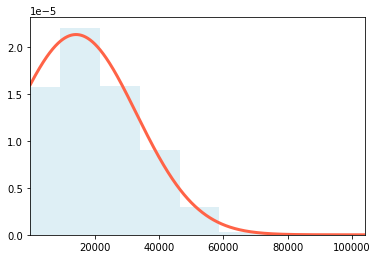

In [ ]:
funcion_d(df,'gle_cgdpc')

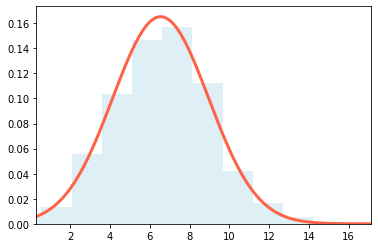

In [ ]:
funcion_d(df,'wdi_exph')